## How To Become Tiktok Famous 💃
- Tiktok is a short video sharing application with over 1.1 billion users, known for accelerating the transfer of internet cultures, trends and music.
- This will be an investigation into the various aspects of what it takes to become Tiktok Famous - music, video, creator demographics
- Data sourced from manually from Tiktok API, Kaggle data using Tiktok and Spotify APIs
### Do I have what it takes to become famous?
<div>
<img src="https://s.yimg.com/uu/api/res/1.2/Gf1sv_WxuocJ1CPydjwmhw--~B/Zmk9ZmlsbDtoPTc0Nzt3PTg3NTthcHBpZD15dGFjaHlvbg--/https://media-mbst-pub-ue1.s3.amazonaws.com/creatr-uploaded-images/2021-06/2e0f6410-d2bb-11eb-bdfe-44902db156ed.cf.jpg" width="400"/>
</div>

In [100]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict
import emoji
from wordcloud import WordCloud
from collections import Counter
import datetime
import geopandas as gpd
import seaborn as sns
import math
import os
from datetime import datetime

%matplotlib inline

plt.rcParams["figure.figsize"] = (15, 10)

saved_style_state = matplotlib.rcParams.copy()

## What Music Should I Pick? 🎶
The sound paired with a Tiktok is a huge factor to it's success. Let's look into what makes a sound popular.

In [89]:
filepath = 'tiktok-data/TikTok_songs_2022.csv'
tiktok_songs = pd.read_csv(filepath)
tiktok_songs.columns

Index(['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop',
       'danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

array([[<AxesSubplot:xlabel='artist_pop', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='track_pop', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='danceability', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='energy', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='loudness', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='mode', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='key', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='speechiness', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='acousticness', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='liveness', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='valence', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='tempo', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='time_signature', ylabel='artist_pop'>,
        <AxesSubplot:xlabel='duration_ms', ylabel='artist_pop'>],
       [<AxesSubplot:xlabel='artist_pop', ylabel='tra

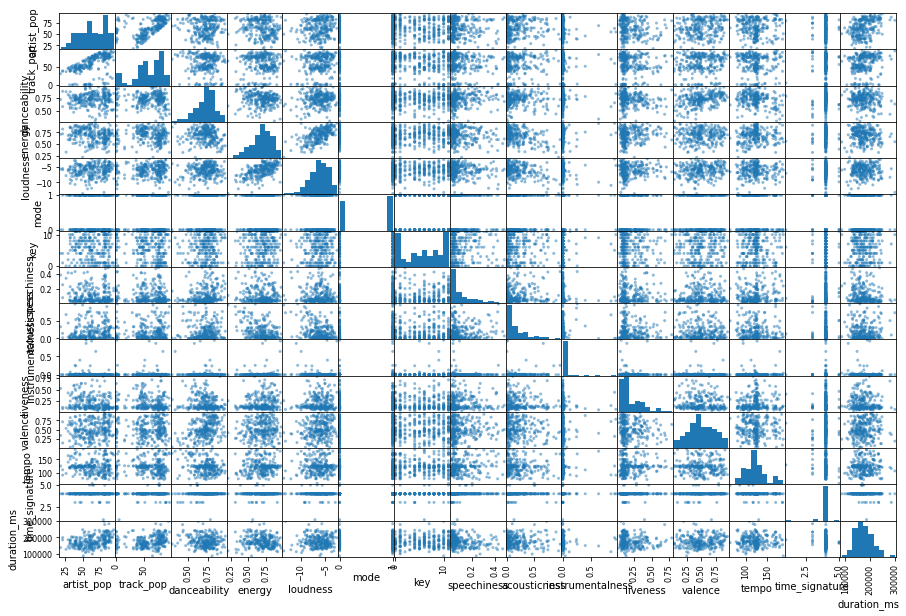

In [42]:
pd.plotting.scatter_matrix(tiktok_songs)

## Which artist should I pick? 🎤

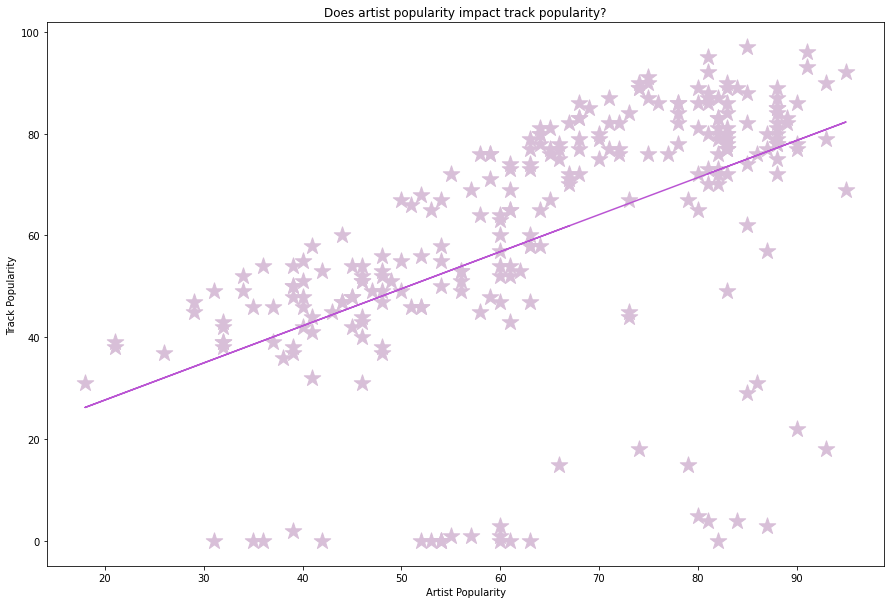

In [43]:
plt.scatter(tiktok_songs.artist_pop, tiktok_songs.track_pop, color='thistle',s=300, marker='*')
a, b = np.polyfit(tiktok_songs.artist_pop, tiktok_songs.track_pop, 1)
plt.plot(tiktok_songs.artist_pop, a*tiktok_songs.artist_pop+b, color='mediumorchid')
plt.title('Does artist popularity impact track popularity?')
plt.xlabel('Artist Popularity')
plt.ylabel('Track Popularity')
plt.show()

- We notice that there is a direct positive correlation between artist and track popularity
- This indicates how viewers are likely to connect with popular artists they already know and hence tracks from these artists will perform better
- For examples, songs by The Weekend, Drake and Harry Styles performed really strongly

## What goes into a popular hit track 🎵

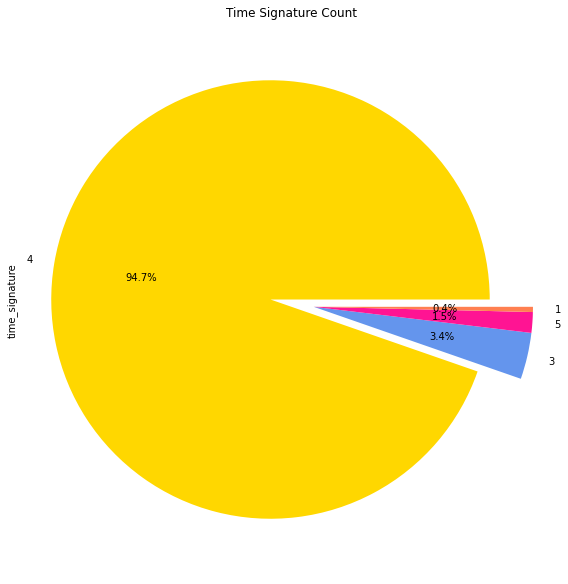

In [44]:
explode = (0.2, 0, 0, 0)
time_signature_count = tiktok_songs['time_signature'].value_counts()
time_signature_count.plot(kind='pie', explode=explode, colors=['gold', 'cornflowerblue', 'deeppink','coral'], autopct='%1.1f%%', figsize=(8,8))
plt.axis('equal')
plt.tight_layout()
plt.title('Time Signature Count')
plt.rcParams.update({'font.size': 24})
plt.show()


- A majority of the songs here are in quadruple time
- Quadruple time is commonly used in Western pop music - it's familiar and makes the music more accessible and easy to connect to
- The steady and relatively predicable pattern makes allows people to easily choreograph and dance to the music.

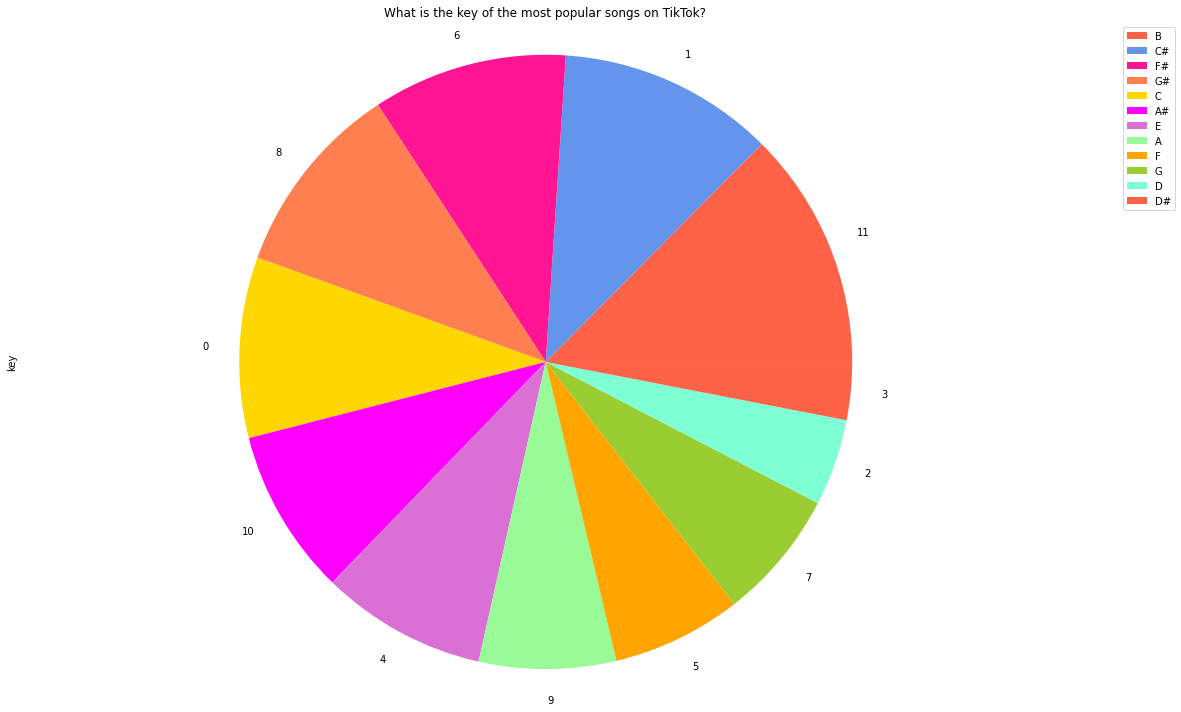

In [95]:
key_labels = {
    0: 'C',
    1: 'C#',
    2: 'D',
    3: 'D#',
    4: 'E',
    5: 'F',
    6: 'F#',
    7: 'G',
    8: 'G#',
    9: 'A',
    10: 'A#',
    11: 'B',
}
time_signature_count = tiktok_songs['key'].value_counts()
time_signature_count.plot(kind='pie', title='Key Count', colors=['tomato', 'cornflowerblue', 'deeppink','coral', 'gold', 'magenta', 'orchid', 'palegreen', 'orange', 'yellowgreen', 'aquamarine'])
plt.axis('equal')
plt.tight_layout()
plt.title('What is the key of the most popular songs on TikTok?')
plt.legend(labels=[key_labels[key] for key in time_signature_count.index], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.rcParams.update({'font.size': 24})
plt.show()

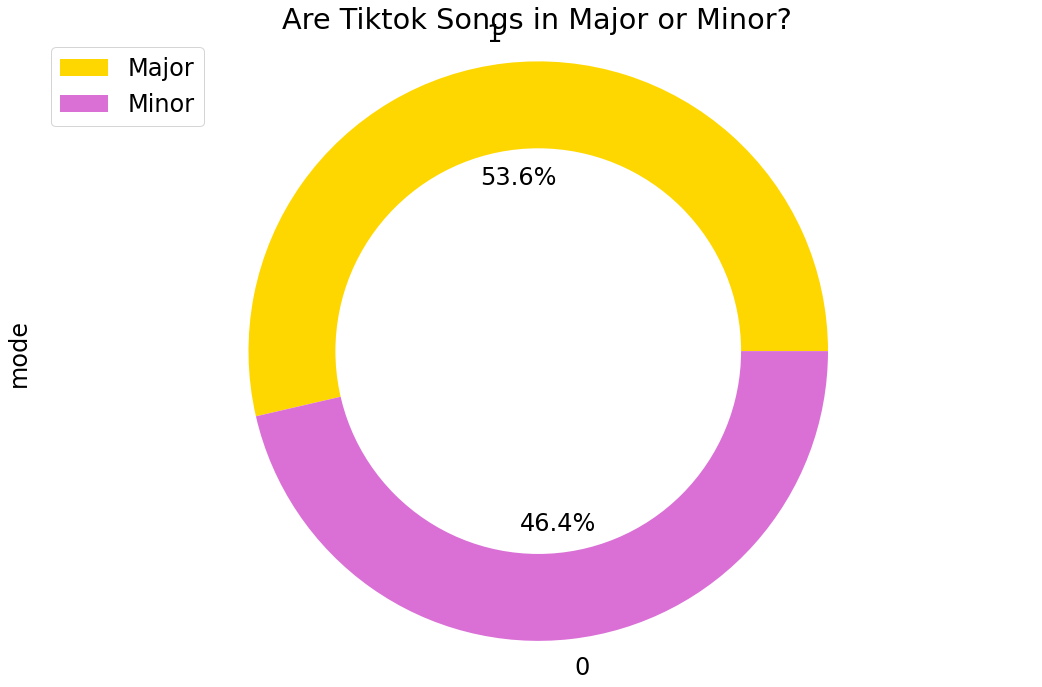

In [93]:
time_signature_count = tiktok_songs['mode'].value_counts()
time_signature_count.plot(kind='pie', colors=['gold','orchid'], autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Are Tiktok Songs in Major or Minor?')
plt.axis('equal')
plt.tight_layout()
plt.legend(labels=['Major', 'Minor'], loc='upper left')
plt.rcParams.update({'font.size': 24})
plt.show()

## Look into the top 250 Most Followed 👥

In [47]:
filepath = 'tiktok-data/top-250-tiktokers.csv'
tiktokers = pd.read_csv(filepath)
print("done")
tiktokers.head()

done


,Rank,Username,Country,Followers,Views,Likes,Engagement,Brand Account,Gender,Age,Ethnicity,Famous,Genre,LGBTQ
0,1,@charlidamelio,U.S.A,78.9m,38.3m,6.1m,16.60%,0,Female,16.0,White,0.0,"Dancing, Lipsyncing, Lifestyle",0.0
1,2,@addisonre,U.S.A,53.7m,13.8m,2.8m,20.80%,0,Female,19.0,White,0.0,"Dancing, Lipsyncing",0.0
2,3,@zachking,U.S.A,47.3m,17.6m,2.8m,16%,0,Male,30.0,East Asian,1.0,"Comedy, Illusion",0.0
3,4,@lorengray,U.S.A,46.3m,3.2m,622.6k,19.70%,0,Female,18.0,White,1.0,"Dancing, Lipsyncing",0.0
4,5,@tiktok,U.S.A,45.3m,9.4m,503.0k,5.60%,1,NaN,NaN,NaN,1.0,NaN,NaN


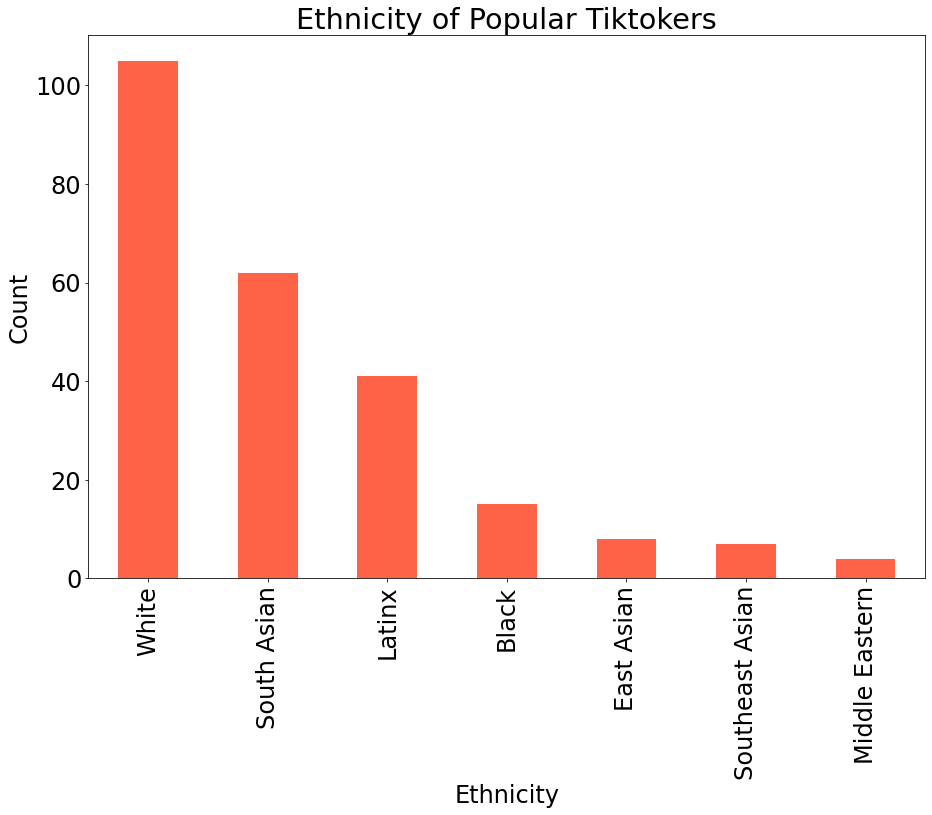

In [48]:
ethnicity_count = tiktokers['Ethnicity'].value_counts()
ethnicity_count.plot(kind='bar', color=['tomato'])
plt.title('Ethnicity of Popular Tiktokers')
plt.rcParams.update({'font.size': 24})
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

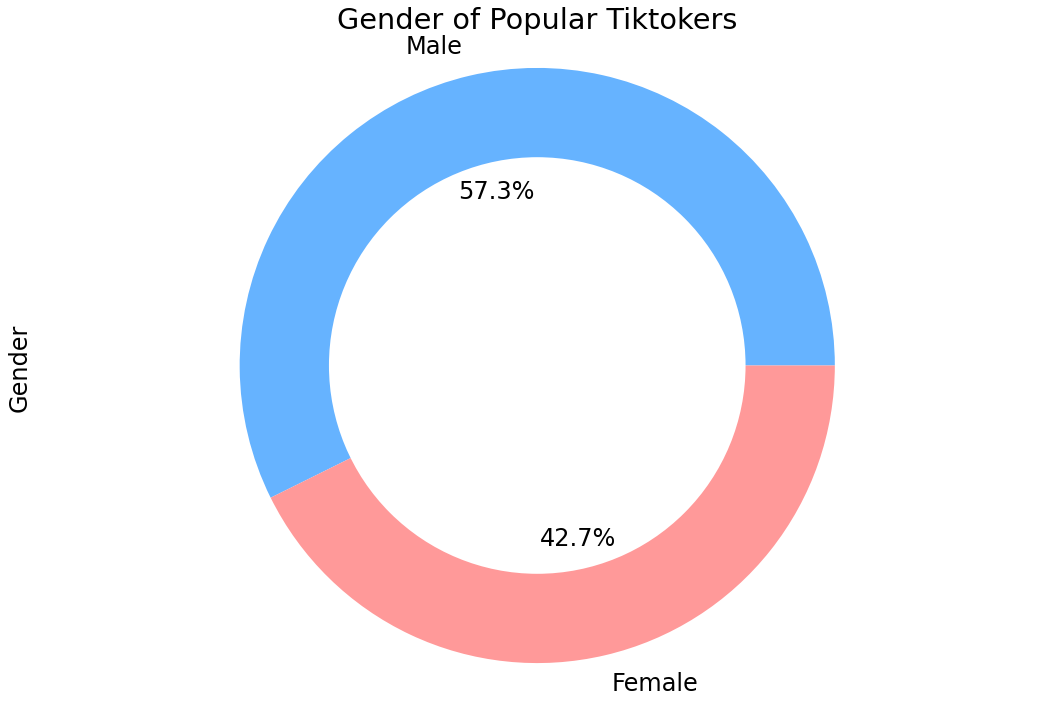

In [49]:
gender = tiktokers['Gender'].value_counts()
gender.plot(kind='pie', colors=['#66b3ff','#ff9999'], autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.title('Gender of Popular Tiktokers')
plt.rcParams.update({'font.size': 24})
plt.show()

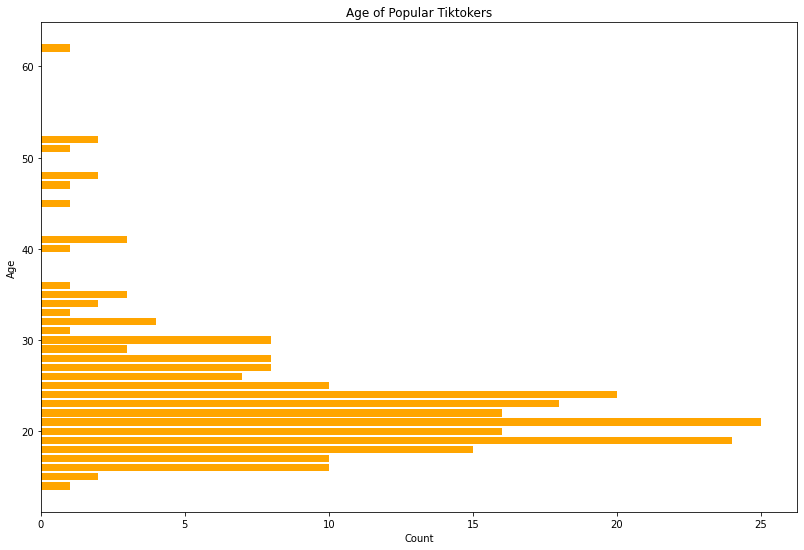

Average age of popular tiktokers:  23.817777777777778
Median age of popular tiktokers:  22.0


In [101]:
age = tiktokers['Age'].value_counts()
age = age.sort_index()
plt.barh(age.index, age.values, color=['orange'])
plt.title('Age of Popular Tiktokers')
plt.xlabel('Count')
plt.ylabel('Age')
plt.subplots_adjust(bottom=0.2)
plt.gcf().subplots_adjust(left=0.2)
plt.rcParams.update({'font.size': 24})
plt.show()

print('Average age of popular tiktokers: ', tiktokers['Age'].mean())
print('Median age of popular tiktokers: ', tiktokers['Age'].median())

- The most followed Tiktokers are clustered in the early 20s age range as shown in the graph
- This reflects the popularity of Tiktok as a social media platform with young people
- The average age of popular tiktoker is a bit older than the highest density age demographic 10-19 as it portrays an aspirational representation of where they may be in a few year - role models

## What are the topics and genres that are popular? 😂

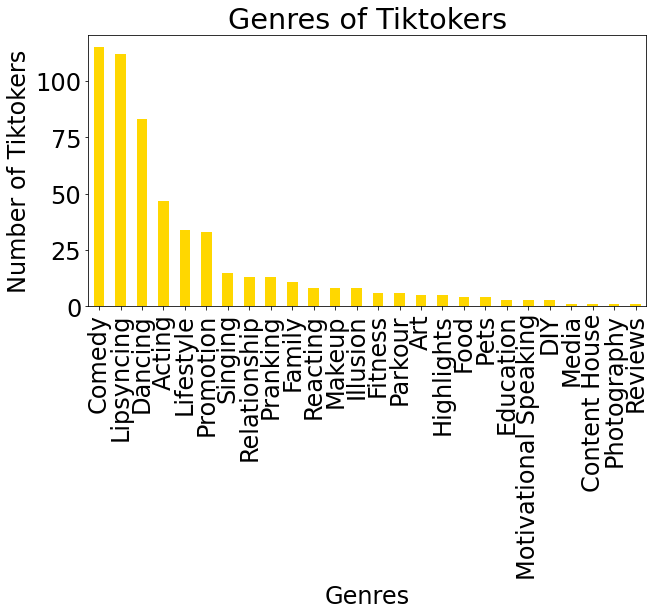

In [51]:
genres = tiktokers['Genre']
genres = genres.str.split(',', expand=True)
genres = genres.stack().str.strip().reset_index(level=1, drop=True).rename('Genres')
genres_count = genres.value_counts()
genres_count.plot(kind='bar', figsize=(10, 5), color='gold')
plt.rcParams.update({'font.size': 24})
plt.title('Genres of Tiktokers')
plt.ylabel('Number of Tiktokers')
plt.xlabel('Genres')
plt.show()

- Genres which are popular are more accessible and have a lower barrier to entry tend to have a larger audience
- Take for example Comdedy and Lipsyncing compared to more speciality topics like Art and Fitness which requires special equipment, knowledge and appreciation

## Where are popular Tiktokers from? 🌏

/tmp/ipykernel_10172/3468173709.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/home/wanning/.local/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/wanning/.local/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


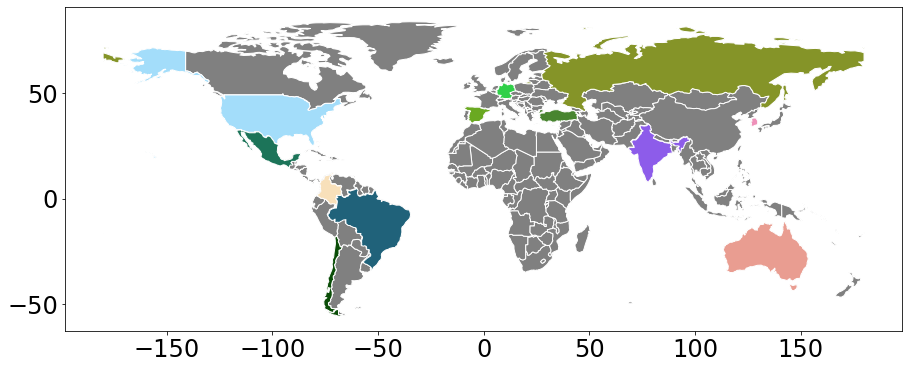

In [96]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world[(world.name != "Antarctica")]
ax2 = world.plot(figsize=(15,15), edgecolor=u'white', color='gray')

countries = tiktokers['Country'].value_counts()
countries = countries[countries > 1]
countries = countries.to_frame().reset_index()
countries.columns = ['Country', 'Count']
countries = countries.sort_values(by='Count', ascending=False)

countries.loc[countries['Country'] == 'U.S.A'] = 'United States of America'

for name in countries['Country']:
    world.loc[world['name'].eq(name)].plot(edgecolor=u'white', color=np.random.rand(3,), ax=ax2)
ax2.axis('scaled')
plt.show()

- We notice countries with a well established entertainment scheme represent
- United States, India, Brazil, South Korea are countries with well established entertainment industries
- Mexico because of it's proximity to U.S.A and the cultural influences.
- Australia's cultural influence from American popular culture.
<div>
<img src="./images/countries.png"/>
</div>

## What's on my FYP ✨
- Fyp is an acronym that means “For You Page”, and refers to the page on TikTok that is filled with recommended content and videos the app thinks you'll enjoy the most.
- Using an API wrapper I was able to extract data from my Tiktok account and scrap the metadata of 500 videos on my FYP

In [ ]:
filepath = "tiktok-data/tiktok_cleaned.csv"
tiktok_data = pd.read_csv(filepath)
tiktok_data.head()

,author_nickname,author_signature,author_uniqueId,author_verified,authorStats_diggCount,authorStats_followerCount,authorStats_followingCount,authorStats_heart,authorStats_heartCount,authorStats_videoCount,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Snake movie 54,Thank you for following along,lkmouhxrd6f,False,9,489500,12.0,19400000,19400000,142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Luke,🦥\nFooty and cricket>>>\nFreo💜🤍\nFlagmantle 23...,_flagmantle,False,395,1261,39.0,56700,56700,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cirqnamics,World Renowned 7thGen Circus Family,cirqnamics,False,893,632700,977.0,17800000,17800000,289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bailey,a girl of many talents \nmy worst enemy out no...,baileyspinn,True,354200,14600000,1800.0,656000000,656000000,2334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Twins Style,🇵🇱 Poland📍\nHubert & Sebastian\n📩 twinsstyle@m...,twinsstylee,True,33100,18500000,127.0,405900000,405900000,1101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


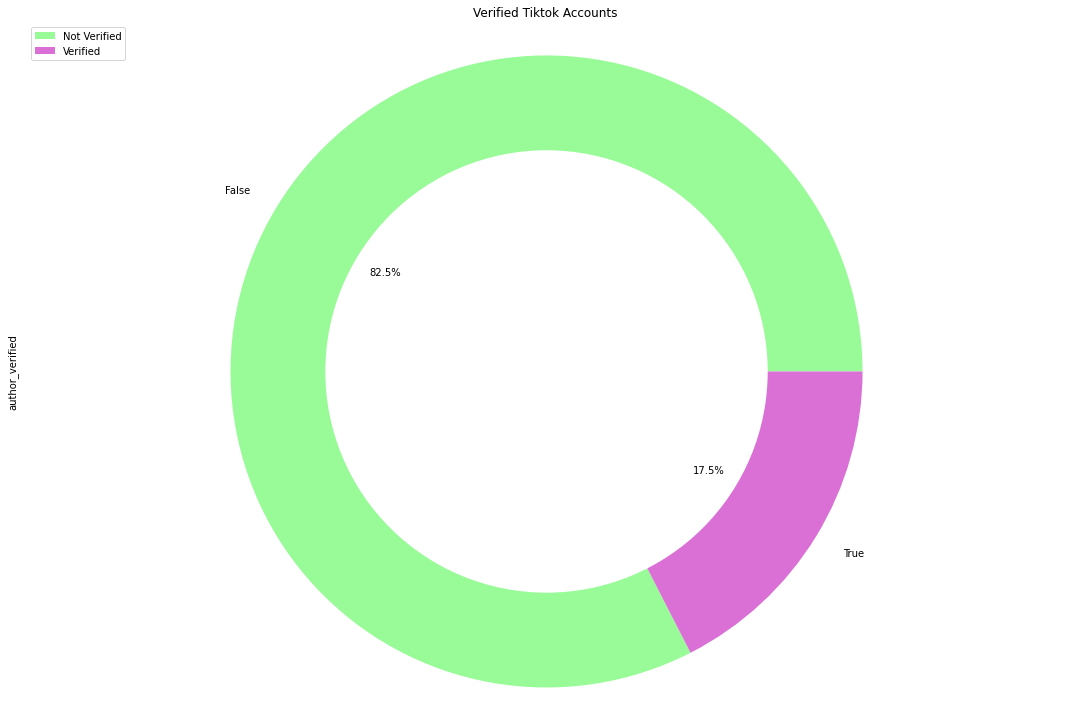

In [91]:
verified_count = tiktok_data['author_verified'].value_counts()
verified_count.plot(kind='pie', colors=['palegreen','orchid'], autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
labels = ['Not Verified', 'Verified']
plt.legend(labels, loc='upper left')
plt.title('Verified Tiktok Accounts')
plt.show()

## What goes into a juicy description ✍🏻

defaultdict(<class 'int'>, {'🧠': 3, '🧬': 2, '🌹': 2, '☂': 2, '😍': 3, '😫': 1, '🥰': 3, '😜': 1, '🤯': 5, '😭': 13, '😱': 4, '☺': 2, '\U0001fa75': 1, '🤭': 4, '🖤': 2, '😳': 11, '😁': 7, '😂': 41, '😤': 1, '🐠': 2, '\U0001f979': 5, '🙌': 2, '🏼': 2, '🤣': 24, '🥺': 2, '❤': 13, '😅': 8, '👏': 3, '👀': 4, '🤦': 4, '💗': 3, '⚡': 2, '💖': 4, '🛍': 1, '✨': 4, '🦙': 1, '🎥': 2, '👑': 3, '⚽': 2, '🦘': 1, '🤩': 1, '😨': 1, '\U0001fae1': 1, '😢': 1, '🔥': 6, '🤔': 3, '👹': 2, '🦈': 2, '💀': 6, '🧐': 1, '🥴': 1, '♂': 4, '🗞': 1, '🤫': 1, '👉': 1, '😩': 3, '🏳': 1, '⚧': 1, '🐶': 2, '🚐': 1, '🌷': 1, '💝': 1, '💐': 1, '👶': 1, '🎀': 1, '🎵': 1, '🎶': 1, '🚨': 2, '📍': 1, '😚': 1, '💕': 3, '🤍': 2, '🦀': 1, '😮': 1, '💨': 1, '🥶': 1, '🌟': 1, '😀': 3, '🦷': 1, '\U0001fae3': 1, '🏽': 2, '\U0001faf6': 1, '😧': 1, '⚠': 4, '🏻': 2, '🍞': 1, '🧚': 1, '♀': 3, '🙏': 2, '❎': 1, '😞': 1, '💜': 1, '🍳': 1, '🌶': 1, '🍕': 1, '🧃': 1, '🍓': 1, '😛': 1, '🙈': 4, '😆': 1, '😔': 1, '🐀': 1, '💩': 1, '👽': 1, '🛏': 1, '\U0001fae7': 1, '🧸': 1, '🍅': 1, '👵': 1, '🐐': 1, '♐': 1, '\U0001fa77': 1, '🥲': 2, 

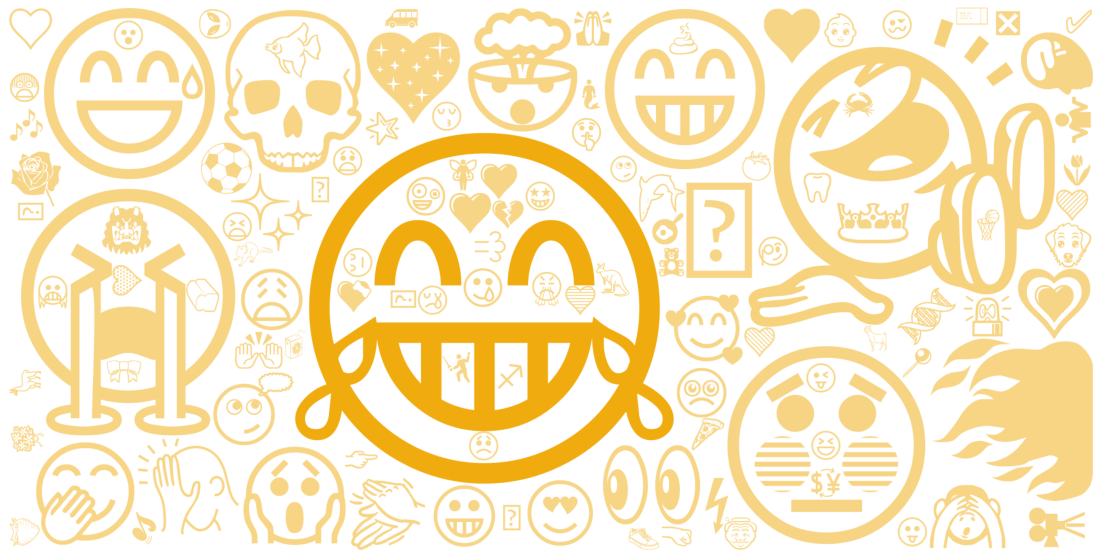

In [ ]:
descriptions = tiktok_data['desc']
descriptions = descriptions.str.lower()
counter = defaultdict(int)
emoji_string = ''

def is_emoji(s):
    return s in emoji.EMOJI_DATA

for description in descriptions:
    for word in str(description):
        if is_emoji(word):
            emoji_string += word
            counter[word] += 1

# Credit from Stack Overflow https://stackoverflow.com/questions/66473771/wordcloud-for-only-emojis
class EmojiCloud:
    def __init__(self, font_path='Symbola.otf'):
        self.font_path = font_path
        self.word_cloud = self.initialize_wordcloud()
        self.emoji_probability = None

    def initialize_wordcloud(self):
        return WordCloud(font_path=self.font_path,
                               width=2000,
                               height=1000,
                               background_color='white',
                               random_state=42,
                               collocations=False)

    def color_func(self, word, font_size, position, orientation, random_state=None,
                   **kwargs):
        hue_saturation = '42, 88%'

        current_emoji_probability = self.emoji_probability[word]
        if current_emoji_probability >= 0.10:
            opacity = 50
        else:
            opacity = 75 - current_emoji_probability/0.2 * 5
        return f"hsl({hue_saturation},{opacity}%)"

    def generate(self, text):
        emoji_frequencies = Counter(emojis.iter(text))
        total_count = sum(emoji_frequencies.values())
        self.emoji_probability = {emoji: count/total_count for emoji, count in emoji_frequencies.items()}
        wc = self.word_cloud.generate_from_frequencies(emoji_frequencies)
        plt.figure(figsize=(20,10))
        plt.imshow(wc.recolor(color_func=self.color_func, random_state=42))
        plt.axis("off")

emoji_cloud = EmojiCloud(font_path='./Symbola.otf')
emoji_cloud.generate(emoji_string)
savefig("figure1.png")

- We notice a trend of the emojis commonly used in description being ones that have facial expressions such as crying laughing with tears and smiling emoji
- Facial emojis elicit emotions in the reader and are easy to relate to
- Emojis compensate quite effectively for the lack of non-verbal clues
- This mimics the trend we saw with the popular genres - comedy and lipsyncing were the most universal
<div>
<img src="./images/caption_emoji.png"/>
</div>

In [ ]:
def isHashtag(word):
    if word == '':
        return False
    elif word[0] == '#':
        return True
    else:
        return False

hashtags = []

for description in descriptions:
        words = str(description).split(' ')
        for word in words:
            if isHashtag(word):
                hashtags.append(word.lower())

hashtags = ' '.join(hashtags)

wordcloud = WordCloud(width=1200, height=700, background_color='white').generate(hashtags)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
savefig("figure2.png")

- TikTok hashtags spread user-generated content to more users, helping them easily find & share the content they are interested in.
- We notice popular tiktoks use these hashtags - there are most commonly searched and known by other users and help propel the traction of the video
- Hashtags that do well are usually short words related to the app
<div>
<img src="./images/hashtags.png"/>
</div>

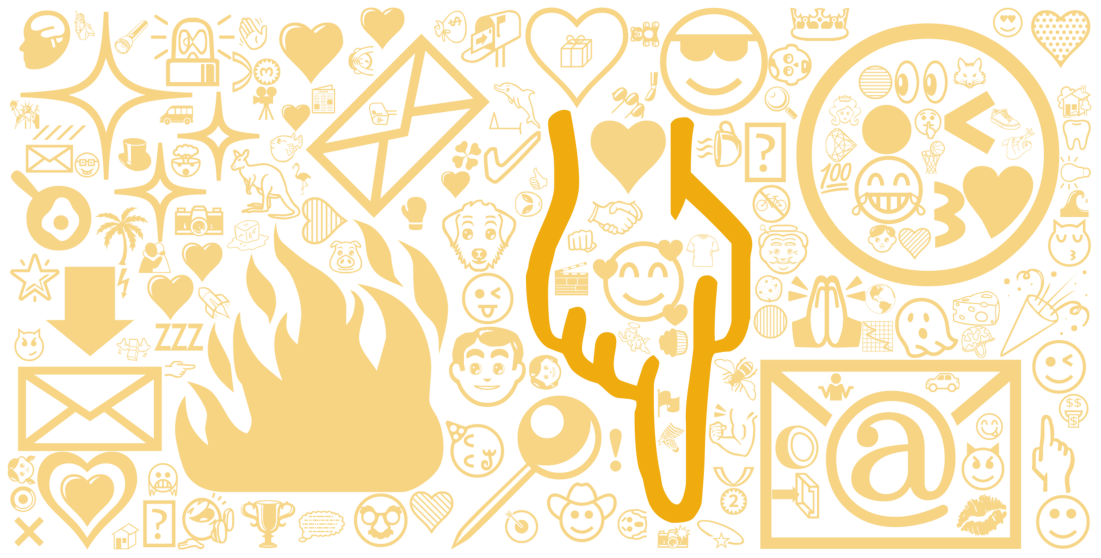

In [ ]:
bio = tiktok_data['author_signature']
emoji_string2 = ''
for row in bio:
    for word in str(row):
        if is_emoji(word):
            emoji_string2 += word
emoji_cloud2 = EmojiCloud(font_path='./Symbola.otf')
emoji_cloud2.generate(emoji_string2)
savefig("figure3.png")


- With Personal bio descriptions we see there is a common trend of emojis with a call to action such as an envelope and a down pointing arrow/finger
- These invite other users to message the user which creates new touchpoints and conversations
- Creates a sense of sincerity and attainability
- Down pointer prompts other users to view a link which may be an Instagram account, blog or online shop
- Tiktok influences often have an extension of their personal brand through the link, and it makes them seem more genuine and real.
<div>
<img src="./images/bio_emoji.png"/>
</div>

In [109]:
names = tiktok_data['author_nickname']
usernames = tiktok_data['author_signature']

def getcountHasDigit(input_list):
    count = 0
    for name in input_list:
        name = str(name)
        if any(char.isdigit() for char in name):
            count += 1
    return count

name_count = getcountHasDigit(names)
print(name_count)

username_count = getcountHasDigit(usernames)
print(username_count)

46
137


## Should I have numbers in my name and username 🔢

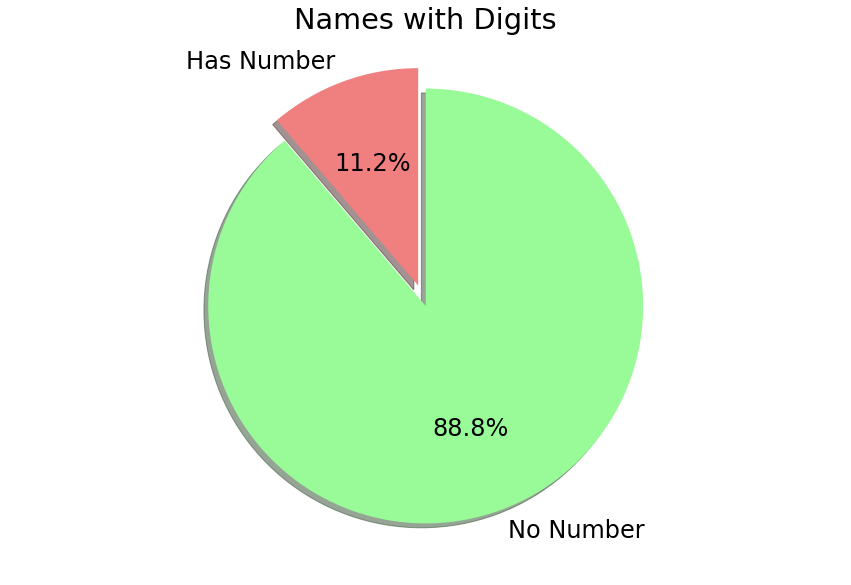

In [108]:
sizes = [name_count, 500-username_count]
labels ='Has Number', 'No Number'
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.axis('equal')
colors = ['lightcoral', 'palegreen']
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Names with Digits')
plt.show()

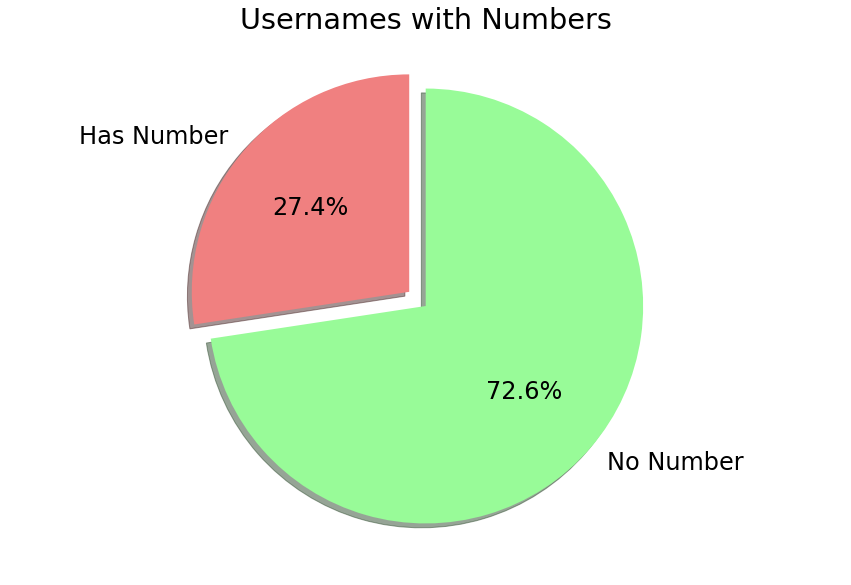

In [110]:
sizes = [username_count, 500-username_count]
labels ='Has Number', 'No Number'
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.axis('equal')
colors = ['lightcoral', 'palegreen']
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Usernames with Numbers')
plt.show()

### Avoid numbers in name and username
- When we were young I'm sure we've have usernames like mangogirl12345 with a bunch of numbers
- But we've noticed that this is not optimal for tiktok fame
- Viewers are less likely to remeber sequences of numbers that accompany a username or name
- We notice a majority of the top performing videos come from tiktokers without numbers in their names and usernames

## How long are popular Tiktoks? ⌛

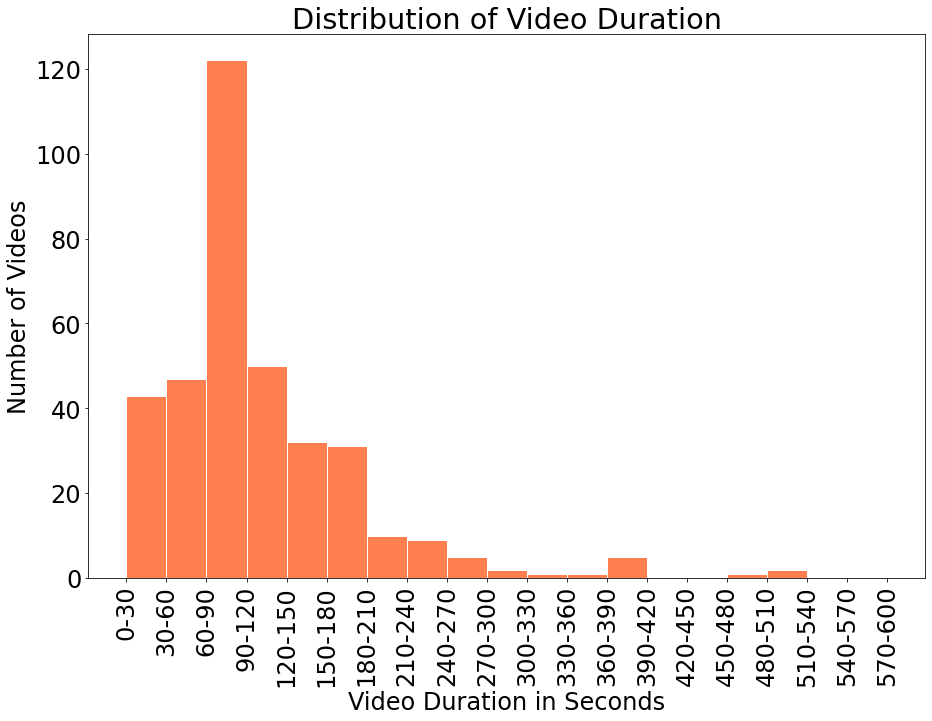

In [111]:
durations = tiktok_data['video_duration']
duration_buckets = []

for d in range(len(durations)):
    if math.isnan(durations[d]):
        continue
    duration_buckets.append(math.floor(durations[d]/30))

labels = {
    0: '0-30',
    1: '30-60',
    2: '60-90',
    3: '90-120',
    4: '120-150',
    5: '150-180',
    6: '180-210',
    7: '210-240',
    8: '240-270',
    9: '270-300',
    10: '300-330',
    11: '330-360',
    12: '360-390',
    13: '390-420',
    14: '420-450',
    15: '450-480',
    16: '480-510',
    17: '510-540',
    18: '540-570',
    19: '570-600',
    20: '600+'
}

plt.hist(duration_buckets, bins=range(0, 20), color='coral', edgecolor='white')
plt.xlabel('Video Duration in Seconds')
plt.xticks(range(0, 20), [labels[i] for i in range(0, 20)], rotation=90)
plt.ylabel('Number of Videos')
plt.title('Distribution of Video Duration')
plt.show()


- We know that Tiktok is a short video sharing platform, but what is the length of an optimal video to both engage but not bore.
- From the video times, I grouped the data into 30 second intervals and investigated the duration of videos on my FYP.
- A noticeable proportion of videos are in the 60 - 90 second division
- Long enough to have substance but short enough to keep your attention span fresh

## When are popular videos posted 🕒

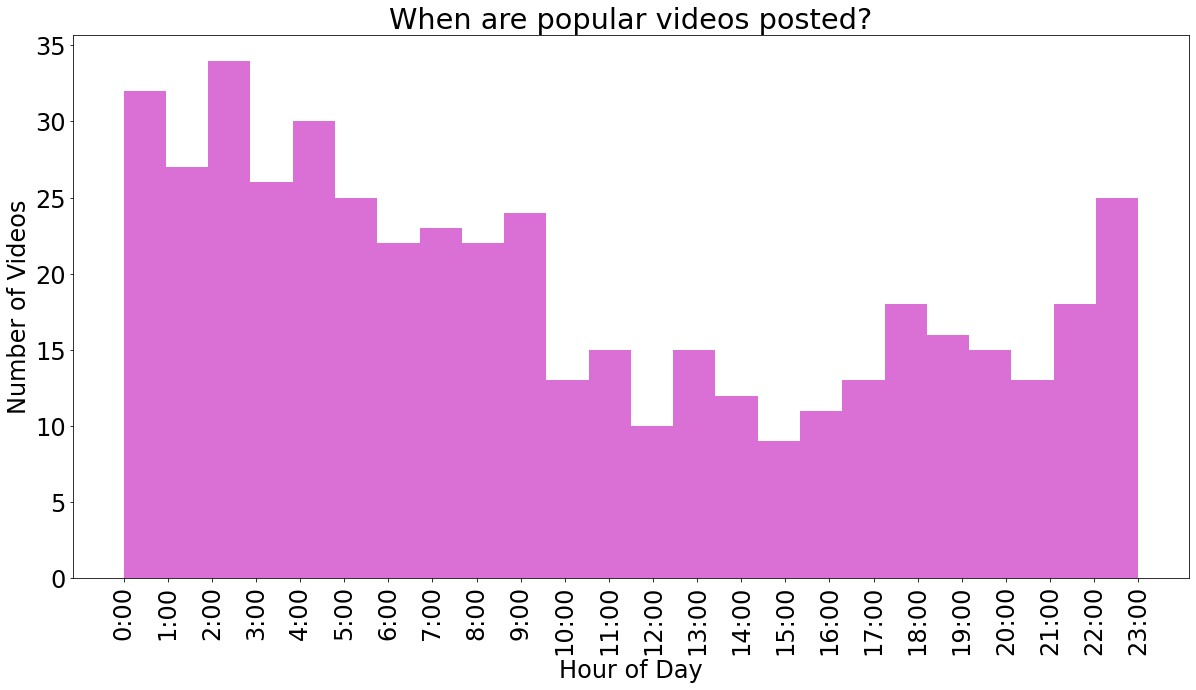

In [ ]:
def get_time_from_unix(unix_time):
    return datetime.datetime.fromtimestamp(unix_time)

hours = []

create_times = tiktok_data['createTime']

for i in range(len(create_times)):
    if not create_times[i].isdigit():
        continue
    time = get_time_from_unix(int(create_times[i]))
    hours.append(time.hour)

plt.hist(hours, bins=24, color='orchid')
plt.title('When are popular videos posted?')
plt.xlabel('Hour of Day')
plt.xticks(range(24), [f'{i}:00' for i in range(24)], rotation=90)
plt.ylabel('Number of Videos')
plt.show()

- Videos are posted in the hours of high online activity
- People tend to post before bed or in the early morning
- We notice a dip during the working and school day - There are less people using the app and less creators uploading during the time

## Summary 🍃
- Keep your content accessible and universal
- Choose music from popular music in a danceable beat
- Use engaging face emojis that resemble the human face and which have a call to action
- Keep videos under 2 minutes and post in the early morning
- Have a simple and easy to remember username


## Thank you for listening ❤️
- After all that, social media should be a place where you express yourself and your individuality
- Popularity and the numbers are transient, but the experience and memories stay with you